# Regression Models with Pycaret

#### Get information

In [4]:
from pycaret.regression import *

In [5]:
# load the dataset from pycaret
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


#### EDA

In [6]:
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [7]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions (600, 8)


#### Preprocessing

In [8]:
# initialize setup

exp_reg102 = setup(data = data, target = 'Price', 
                   session_id=123,
                   normalize = True, 
                   transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                  bin_numeric_features = ['Carat Weight'],
                  log_experiment = True, experiment_name = 'diamond1',
                  silent=True) 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 39)"


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\'

#### Model Training

In [ ]:
best_model = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,712.8586,2545528.9595,1556.7696,0.9749,0.0752,0.0548,1.1300
xgboost,Extreme Gradient Boosting,775.3886,2808499.5695,1640.2406,0.9728,0.0807,0.0589,0.4530
lightgbm,Light Gradient Boosting Machine,766.0853,3116466.5642,1704.0975,0.9704,0.0799,0.0576,0.0800
rf,Random Forest Regressor,850.2817,3268110.2457,1770.5503,0.9686,0.0904,0.0657,0.4820
huber,Huber Regressor,940.6199,3651906.6533,1891.7126,0.9640,0.0972,0.0708,0.1500
ridge,Ridge Regression,952.2538,3846277.6391,1934.6314,0.9624,0.0971,0.0715,0.0110
br,Bayesian Ridge,956.6502,3999159.6452,1967.8153,0.9608,0.0972,0.0716,0.0250
lr,Linear Regression,960.2937,4046533.3058,1978.6945,0.9604,0.0973,0.0717,0.3910
et,Extra Trees Regressor,964.0365,4407851.6806,2061.4017,0.9569,0.1054,0.0758,0.5200
dt,Decision Tree Regressor,1002.3791,4693069.5462,2138.8882,0.9538,0.1086,0.0780,0.0200


In [ ]:
tuned_best = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,685.7048,1454022.1693,1205.8284,0.9840,0.0763,0.0555
1,776.8339,3534614.1994,1880.0570,0.9729,0.0729,0.0541
2,747.0628,2345496.4829,1531.5014,0.9785,0.0753,0.0556
3,688.5715,1516384.9206,1231.4158,0.9833,0.0719,0.0542
4,740.9562,4576693.8234,2139.3209,0.9429,0.0787,0.0554
5,764.6585,3856632.1318,1963.8310,0.9671,0.0759,0.0541
6,814.5372,3033960.1293,1741.8267,0.9715,0.0819,0.0594
7,675.5092,1501088.8156,1225.1893,0.9810,0.0752,0.0545
8,695.6744,1692338.1281,1300.8990,0.9834,0.0727,0.0549


#### Individual model training

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,762.0852,2398824.3414,1548.8138,0.9737,0.0805,0.0581
1,891.4400,5694025.6674,2386.2158,0.9564,0.0790,0.0588
2,747.8227,2302441.7449,1517.3799,0.9789,0.0795,0.0581
3,700.3420,1485922.9146,1218.9844,0.9836,0.0733,0.0558
4,640.5664,1238780.4181,1113.0051,0.9845,0.0784,0.0562
5,835.2700,7118965.6263,2668.1390,0.9392,0.0810,0.0557
6,863.4444,3512642.3609,1874.2045,0.9670,0.0848,0.0621
7,714.5869,2576734.1429,1605.2209,0.9674,0.0752,0.0537
8,740.6562,2290888.7570,1513.5682,0.9775,0.0781,0.0564


In [ ]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

tuned_lightgbm = tune_model(lightgbm, 
                            custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,822.6400,2569287.7739,1602.8998,0.9718,0.0868,0.0641
1,1008.9226,6724757.6372,2593.2138,0.9485,0.0860,0.0618
2,815.8761,2461914.7737,1569.0490,0.9774,0.0857,0.0628
3,805.5570,2066452.6946,1437.5162,0.9772,0.0805,0.0620
4,814.8100,2151031.1608,1466.6394,0.9732,0.0904,0.0664
5,881.7793,4766151.7412,2183.1518,0.9593,0.0838,0.0608
6,951.9875,4092100.1761,2022.8940,0.9616,0.0906,0.0662
7,872.9769,3230168.8544,1797.2671,0.9592,0.0889,0.0654
8,790.5395,2393344.9164,1547.0439,0.9765,0.0801,0.0609


### Evaluate model

In [9]:
# check the residuals of trained model
plot_model(tuned_best, plot = 'residuals_interactive')

NameError: name 'tuned_best' is not defined

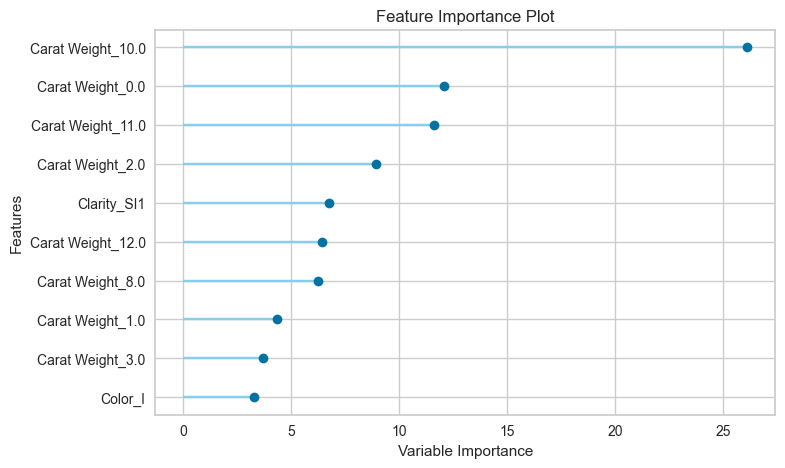

In [ ]:
# check feature importance
plot_model(tuned_best, plot = 'feature')

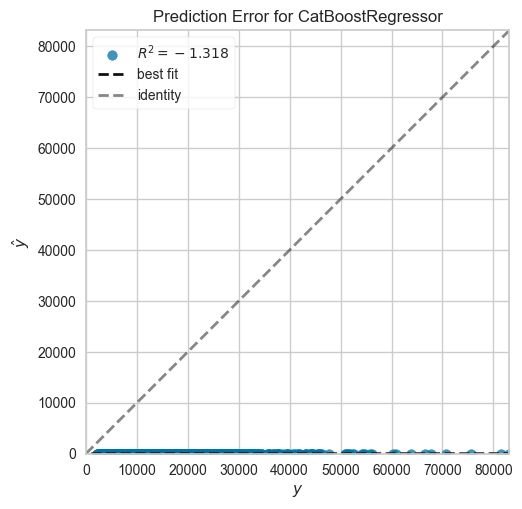

In [ ]:
plot_model(tuned_best, plot = 'error')

In [ ]:
evaluate_model(tuned_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Evaluate model with test data

Before finalizing the model, it is recommended to perform a final check by predicting the test set and reviewing the evaluation metrics. All of the evaluation metrics we've seen above are cross-validated results based **only on the training set (70%)**. Now, we are going to use the test data to see if the performance is different and there may be overfitting.

In [ ]:
predict_model(tuned_best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,701.6315,1892502.1289,1375.6824,0.9827,0.0716,0.0530


### Finish to put into production

In [ ]:
# finalize the model
final_best = finalize_model(tuned_best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ['trained_model',
                  PowerTransformedTargetRegressor(border_count=254, depth=8,
                                                  eta=0.4, l2_leaf_reg=30,
                                                  loss_function='RMSE',
                                                  n_es

### Predictions with unseen data

In [ ]:
unseen_predictions = predict_model(final_best, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,717.3416,1864488.3161,1365.4627,0.9819,0.0705,0.0530


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13153.481033
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10297.862361
2,1.01,Good,E,SI1,G,G,GIA,5161,5019.425345
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,32775.646020
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4105.292425


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9819